### Train PCA for NMF-SFH

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import astropy.units as u
import os
os.chdir('/scratch/gpfs/jiaxuanl/Data/popsed/')

In [3]:
import sys
sys.path.append('/home/jiaxuanl/Research/popsed/')
from popsed import mock
from popsed.speculator import SpectrumPCA
from scipy.stats import norm

In [4]:
wave = np.load('./train_sed_NMF/fsps.wavelength.npy')

Now we have 11 params: 4+2 SFH + 1 tage + 1 logzsol + 3 dusts

In [5]:
for i_bin in range(5):
    print('i_bin =', i_bin)
    wave_bin = [ 
            (wave >= 1000) & (wave < 2000), 
            (wave >= 2000) & (wave < 3600), 
            (wave >= 3600) & (wave < 5500), 
            (wave >= 5500) & (wave < 7410), 
            (wave >= 7410) & (wave < 60000)
            ][i_bin]
    str_wbin = [
            '.w1000_2000', 
            '.w2000_3600', 
            '.w3600_5500', 
            '.w5500_7410', 
            '.w7410_60000' 
            ][i_bin]
    n_comp = [70, 50, 50, 50, 50][i_bin]
    
    pca = SpectrumPCA(11, n_comp,
                      [f'./train_sed_NMF/fsps.NMF.v0.1.log10spectrum.seed{k}{str_wbin}.npy' for k in range(5, 15)]
                     )
    pca.scale_spectra()
    pca.train_pca(chunk_size=1000)
    del pca.normalized_logspec
    pca.save(f'./train_sed_NMF/fsps.NMF.pca_trained{str_wbin}.pkl')

i_bin = 0
i_bin = 1
i_bin = 2
i_bin = 3
i_bin = 4


In [5]:
log_spec = np.zeros((10000, len(wave)))
log_spec_in_basis = np.zeros((10000, len(wave)))

for i_bin in range(5):
    wave_bin = [ 
            (wave >= 1000) & (wave < 2000), 
            (wave >= 2000) & (wave < 3600), 
            (wave >= 3600) & (wave < 5500), 
            (wave >= 5500) & (wave < 7410), 
            (wave >= 7410) & (wave < 60000)
            ][i_bin]
    str_wbin = [
            '.w1000_2000', 
            '.w2000_3600', 
            '.w3600_5500', 
            '.w5500_7410', 
            '.w7410_60000' 
            ][i_bin]

    with open(f'./train_sed_NMF/fsps.NMF.pca_trained{str_wbin}.pkl', 'rb') as f:
        pca = pickle.load(f)
        
    log_spec[:, wave_bin], log_spec_in_basis[:, wave_bin] = pca.validate_pca_basis(
        f'./train_sed_NMF/fsps.NMF.v0.1.log10spectrum.seed4{str_wbin}.npy'
    )

In [21]:
i_bin = 0

wave_bin = [ 
        (wave >= 1000) & (wave < 2000), 
        (wave >= 2000) & (wave < 3600), 
        (wave >= 3600) & (wave < 5500), 
        (wave >= 5500) & (wave < 7410), 
        (wave >= 7410) & (wave < 60000)
        ][i_bin]
str_wbin = [
        '.w1000_2000', 
        '.w2000_3600', 
        '.w3600_5500', 
        '.w5500_7410', 
        '.w7410_60000' 
        ][i_bin]

pca = SpectrumPCA(10, 50,
                  [f'./train_sed_NMF/fsps.NMF.v0.1.log10spectrum.seed{k}{str_wbin}.npy' for k in range(5, 15)]
                 )
pca.scale_spectra()
pca.train_pca(chunk_size=1000)

In [22]:
log_spec, log_spec_in_basis = pca.validate_pca_basis(
        f'./train_sed_NMF/fsps.NMF.v0.1.log10spectrum.seed4{str_wbin}.npy'
    )

In [23]:
diff = (10**log_spec - 10**log_spec_in_basis) / 10**log_spec * 100

In [24]:
np.where(np.abs(diff).mean(axis=1) > 1)

(array([   6,    8,   10, ..., 9988, 9990, 9992]),)

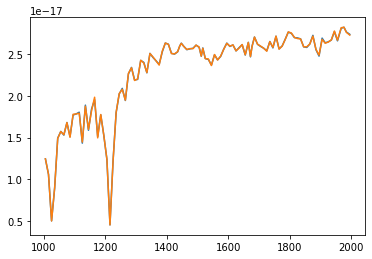

In [25]:
ind = 1873
plt.plot(wave[wave_bin], 10**log_spec[ind])
plt.plot(wave[wave_bin], 10**log_spec_in_basis[ind])

Text(0.5, 0, 'Wavelength [nm]')

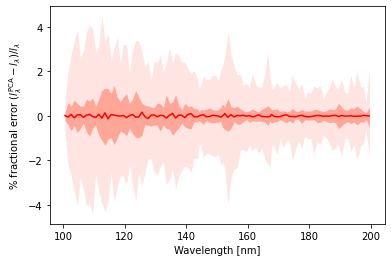

In [26]:
# x = wave / 10
x = wave[wave_bin] / 10
plt.plot(x, np.median(diff, axis=0), color='r')
plt.fill_between(x, 
                 np.percentile(diff, (1 - norm.cdf(1)) * 100, axis=0), 
                 np.percentile(diff, norm.cdf(1) * 100, axis=0), alpha=0.5, lw=0.1,
                 color='tomato')

plt.fill_between(x, 
                 np.percentile(diff, (1 - norm.cdf(2)) * 100, axis=0), 
                 np.percentile(diff, norm.cdf(2) * 100, axis=0), alpha=0.2, color='salmon', lw=0.1)

# plt.ylim(-1, 1)

plt.ylabel(r'% fractional error $(l_{\lambda}^{\mathrm{PCA}} - l_{\lambda})/l_{\lambda}$')
plt.xlabel('Wavelength [nm]')

# plt.xscale('log')

# [plt.axvline(lamb) for lamb in [100, 200, 360, 550, 741]]

In [27]:
del pca.normalized_logspec
pca.save(f'./train_sed_NMF/fsps.NMF.pca_trained{str_wbin}.50comp.pkl')

---

In [6]:
diff = (10**log_spec - 10**log_spec_in_basis) / 10**log_spec * 100

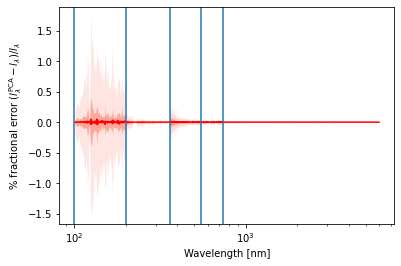

In [7]:
x = wave / 10
# x = wave[wave_bin] / 10
plt.plot(x, np.median(diff, axis=0), color='r')
plt.fill_between(x, 
                 np.percentile(diff, (1 - norm.cdf(1)) * 100, axis=0), 
                 np.percentile(diff, norm.cdf(1) * 100, axis=0), alpha=0.5, lw=0.1,
                 color='tomato')

plt.fill_between(x, 
                 np.percentile(diff, (1 - norm.cdf(2)) * 100, axis=0), 
                 np.percentile(diff, norm.cdf(2) * 100, axis=0), alpha=0.2, color='salmon', lw=0.1)

# plt.ylim(-1, 1)

plt.ylabel(r'% fractional error $(l_{\lambda}^{\mathrm{PCA}} - l_{\lambda})/l_{\lambda}$')
plt.xlabel('Wavelength [nm]')

plt.xscale('log')

[plt.axvline(lamb) for lamb in [100, 200, 360, 550, 741]]
# plt.ylim(-0.06, 0.06)

(-0.06, 0.06)

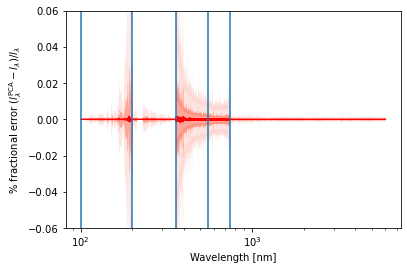

In [99]:
x = wave / 10
# x = wave[wave_bin] / 10
plt.plot(x, np.median(diff, axis=0), color='r')
plt.fill_between(x, 
                 np.percentile(diff, (1 - norm.cdf(1)) * 100, axis=0), 
                 np.percentile(diff, norm.cdf(1) * 100, axis=0), alpha=0.5, lw=0.1,
                 color='tomato')

plt.fill_between(x, 
                 np.percentile(diff, (1 - norm.cdf(2)) * 100, axis=0), 
                 np.percentile(diff, norm.cdf(2) * 100, axis=0), alpha=0.2, color='salmon', lw=0.1)

# plt.ylim(-1, 1)

plt.ylabel(r'% fractional error $(l_{\lambda}^{\mathrm{PCA}} - l_{\lambda})/l_{\lambda}$')
plt.xlabel('Wavelength [nm]')

plt.xscale('log')

[plt.axvline(lamb) for lamb in [100, 200, 360, 550, 741]]
plt.ylim(-0.06, 0.06)

Text(0.5, 0.98, 'PCA components')

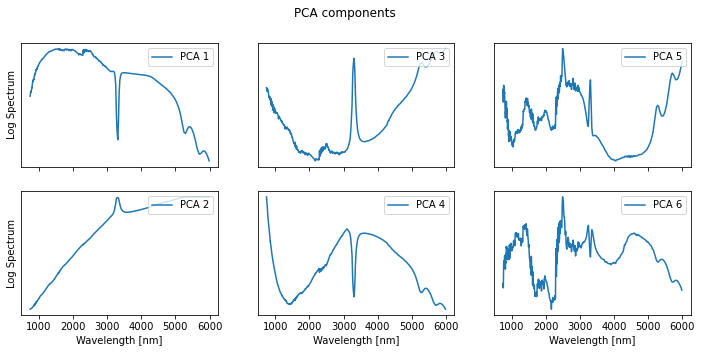

In [98]:
fig, axes = plt.subplots(2, 3, figsize=(12, 5), sharex=True)

x = wave[wave_bin] / 10

for i in range(6):
    ax = axes[i % 2, i // 2]
    ax.plot(x, pca.PCA.components_[i], label=f'PCA {i + 1}')
    ax.set_yticks([])
    ax.legend(loc='upper right')

axes[0][0].set_ylabel('Log Spectrum')
axes[1][0].set_ylabel('Log Spectrum')

for k in range(3):
    axes[1][k].set_xlabel('Wavelength [nm]')
    
plt.suptitle('PCA components')